In [110]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from DLC_for_WBFM.utils.projects.finished_project_data import ProjectData
from sklearn.experimental import enable_iterative_imputer
import napari
import pandas as pd
from sklearn.impute import IterativeImputer
from DLC_for_WBFM.utils.postprocessing.utils_imputation import update_dataframe_using_flat_names
from DLC_for_WBFM.utils.postprocessing.utils_imputation import df_of_only_locations, scale_impute_descale
import numpy as np
from DLC_for_WBFM.utils.postprocessing.postprocessing_utils import filter_dataframe_using_likelihood


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-tracklet_wiggle/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname)

Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/worm3-tracklet_wiggle 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: True
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: True
green_traces: True
final_tracks: True
behavior_annotations: True



In [76]:
df_raw = project_data.final_tracks
df_raw.replace(0.0, np.nan, inplace=True)
df_raw.head()

neuron_001                                    neuron_002                     \
           z           x           y likelihood          z   x   y likelihood   
0  10.443094  276.636464  497.683978   0.671144        NaN NaN NaN        NaN   
1  10.444206  290.109442  483.150215   0.899519        NaN NaN NaN        NaN   
2   9.079404  283.942928  480.393300   0.682838        NaN NaN NaN        NaN   
3   9.909292  268.496681  472.934735   0.689108        NaN NaN NaN        NaN   
4  11.068036  247.073171  486.473684   0.745689        NaN NaN NaN        NaN   

  neuron_003              ...  neuron_118            neuron_119          \
           z           x  ...           y likelihood          z   x   y   
0   8.235679  298.708674  ...  286.978903   0.835623        NaN NaN NaN   
1   7.815642  257.850559  ...  276.579545   0.943604        NaN NaN NaN   
2   8.257437  249.851259  ...  278.956667   0.779339        NaN NaN NaN   
3   8.158951  236.592593  ...  271.278090   0.767425        NaN NaN NaN   
4   8.152603  251.840215  ...  282.678138        NaN        NaN NaN NaN   

             neuron_120                                     
  likelihood          z           x           y likelihood  
0        NaN  23.461404  275.857895  322.866667   0.581561  
1        NaN  21.298592  230.352113  313.333803   0.909814  
2        NaN  21.837097  227.735484  318.825806   0.907686  
3        NaN  22.346760  218.905429  297.092820   0.541654  
4        NaN  20.417892  253.906863  302.598039   0.931628  

[5 rows x 480 columns]

In [77]:
df_with_likelihood = df_raw.copy()

likelihood_thresh = 0.3
df_filter = filter_dataframe_using_likelihood(df_with_likelihood, likelihood_thresh)
df_only_locations, old2new_names = df_of_only_locations(df_filter)

  0%|          | 0/120 [00:00<?, ?it/s]

In [195]:
df_sklearn, imputer, scaler = scale_impute_descale(df_only_locations, 10, random_state=None, max_iter=20, imputer_kwargs={'sample_posterior': True})

[IterativeImputer] Completing matrix with shape (1500, 360)


In [112]:
df_imputed = update_dataframe_using_flat_names(df_raw, df_sklearn, old2new_names)

In [113]:
df_imputed.head()

neuron_001                                    neuron_002              \
           z           x           y likelihood          z           x   
0  10.443094  276.636464  497.683978   0.671144   8.057196  302.009279   
1  10.444206  290.109442  483.150215   0.899519   7.794950  263.888428   
2   9.079404  283.942928  480.393300   0.682838   7.990836  258.992293   
3   9.909292  268.496681  472.934735   0.689108   8.102502  242.618463   
4  11.068036  247.073171  486.473684   0.745689   7.770358  259.799737   

                         neuron_003              ...  neuron_118             \
            y likelihood          z           x  ...           y likelihood   
0  374.216597        NaN   8.235679  298.708674  ...  286.978903   0.835623   
1  357.143574        NaN   7.815642  257.850559  ...  276.579545   0.943604   
2  359.765970        NaN   8.257437  249.851259  ...  278.956667   0.779339   
3  351.110294        NaN   8.158951  236.592593  ...  271.278090   0.767425   
4  360.401214        NaN   8.152603  251.840215  ...  282.678138        NaN   

  neuron_119                                    neuron_120              \
           z           x           y likelihood          z           x   
0  19.050751  357.823625  719.540352        NaN  23.461404  275.857895   
1  20.167704  419.799824  841.447619        NaN  21.298592  230.352113   
2  21.736040  452.491020  766.782024        NaN  21.837097  227.735484   
3  20.878602  450.538464  879.837615        NaN  22.346760  218.905429   
4  21.834907  465.589167  830.687644        NaN  20.417892  253.906863   

                          
            y likelihood  
0  322.866667   0.581561  
1  313.333803   0.909814  
2  318.825806   0.907686  
3  297.092820   0.541654  
4  302.598039   0.931628  

[5 rows x 480 columns]

# Look at tracked neurons and leifer-only tracking

In [55]:
# Different project from same templates
fname = "/scratch/zimmer/Charles/dlc_stacks/worm3-imputation/3-tracking/postprocessing/leifer_tracks.h5"
df_initial = pd.read_hdf(fname)
df_initial.replace(0.0, np.nan, inplace=True)

In [56]:
name = 'neuron_001'


In [81]:
track = df_tracks[name]
track_initial = df_initial[name]

In [82]:
track.head()

,z,x,y,likelihood
0,10.443094,276.636464,497.683978,0.671144
1,10.444206,290.109442,483.150215,0.899519
2,9.079404,283.942928,480.393300,0.682838
3,9.909292,268.496681,472.934735,0.689108
4,11.068036,247.073171,486.473684,0.745689


In [83]:
track_initial.head()

,z,x,y,likelihood
0,10.443094,276.636464,497.683978,0.373838
1,11.683824,264.823529,478.867647,0.255362
2,NaN,NaN,NaN,NaN
3,15.669643,236.559949,514.267857,0.254319
4,11.068036,247.073171,486.473684,0.182753


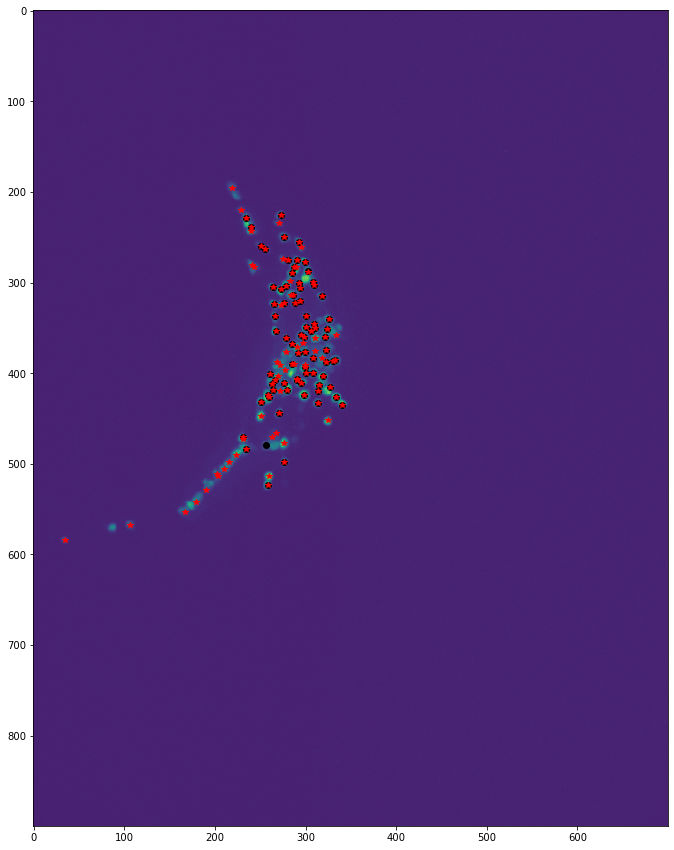

In [89]:
plt.figure(figsize=(15,15))

t = 0
all_names = list(df_tracks.columns.levels[0])

def get_pose(df, t, coords=['z', 'x', 'y']):
    out = []
    for c in coords:
        out.append([df[name][c].iloc[t] for name in all_names])
    return out

out = get_pose(df_raw, t)
z1, x1, y1 = out

out = get_pose(df_initial, t)
z2, x2, y2 = out
# x2, y2 = [df_initial[name]['x'], df_initial[name]['y'] for name in all_names]

plt.imshow(np.max(project_data.red_data[t,...], axis=0).T)

plt.plot(x1, y1, 'ko')
plt.plot(x2, y2, 'r*');

# Calculate multiple examples for one time point

In [222]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [175]:
df_thresh = filter_dataframe_using_likelihood(df_initial,threshold=0.5)

df_thresh.drop(columns='likelihood', level=1, inplace=True)
zxy_initial = np.expand_dims(df_thresh.iloc[0].to_numpy(), axis=0)

# zxy_initial = np.expand_dims(np.hstack(get_pose(df_thresh, t=0)), axis=0)
# zxy_initial2 = np.expand_dims(np.hstack(get_pose(df_thresh, t=1)), axis=0)

  0%|          | 0/120 [00:00<?, ?it/s]

In [220]:
df_thresh['neuron_009'].head()

,z,x,y
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,23.150573,279.310966,334.842881


In [177]:
zxy_initial[:, :9]

array([[         nan,          nan,          nan,   8.42687075,
        310.56632653, 375.92176871,   8.23567921, 298.7086743 ,
        360.07201309]])

In [200]:
all_dat = []
for i in range(10):
    dat_sklearn = imputer.transform(scaler.transform(zxy_initial))
    dat_sklearn = scaler.inverse_transform(dat_sklearn)
    all_dat.append(dat_sklearn)
    # dat_sklearn[:, :9]

[IterativeImputer] Completing matrix with shape (1, 360)
[IterativeImputer] Completing matrix with shape (1, 360)
[IterativeImputer] Completing matrix with shape (1, 360)
[IterativeImputer] Completing matrix with shape (1, 360)
[IterativeImputer] Completing matrix with shape (1, 360)
[IterativeImputer] Completing matrix with shape (1, 360)
[IterativeImputer] Completing matrix with shape (1, 360)
[IterativeImputer] Completing matrix with shape (1, 360)
[IterativeImputer] Completing matrix with shape (1, 360)
[IterativeImputer] Completing matrix with shape (1, 360)


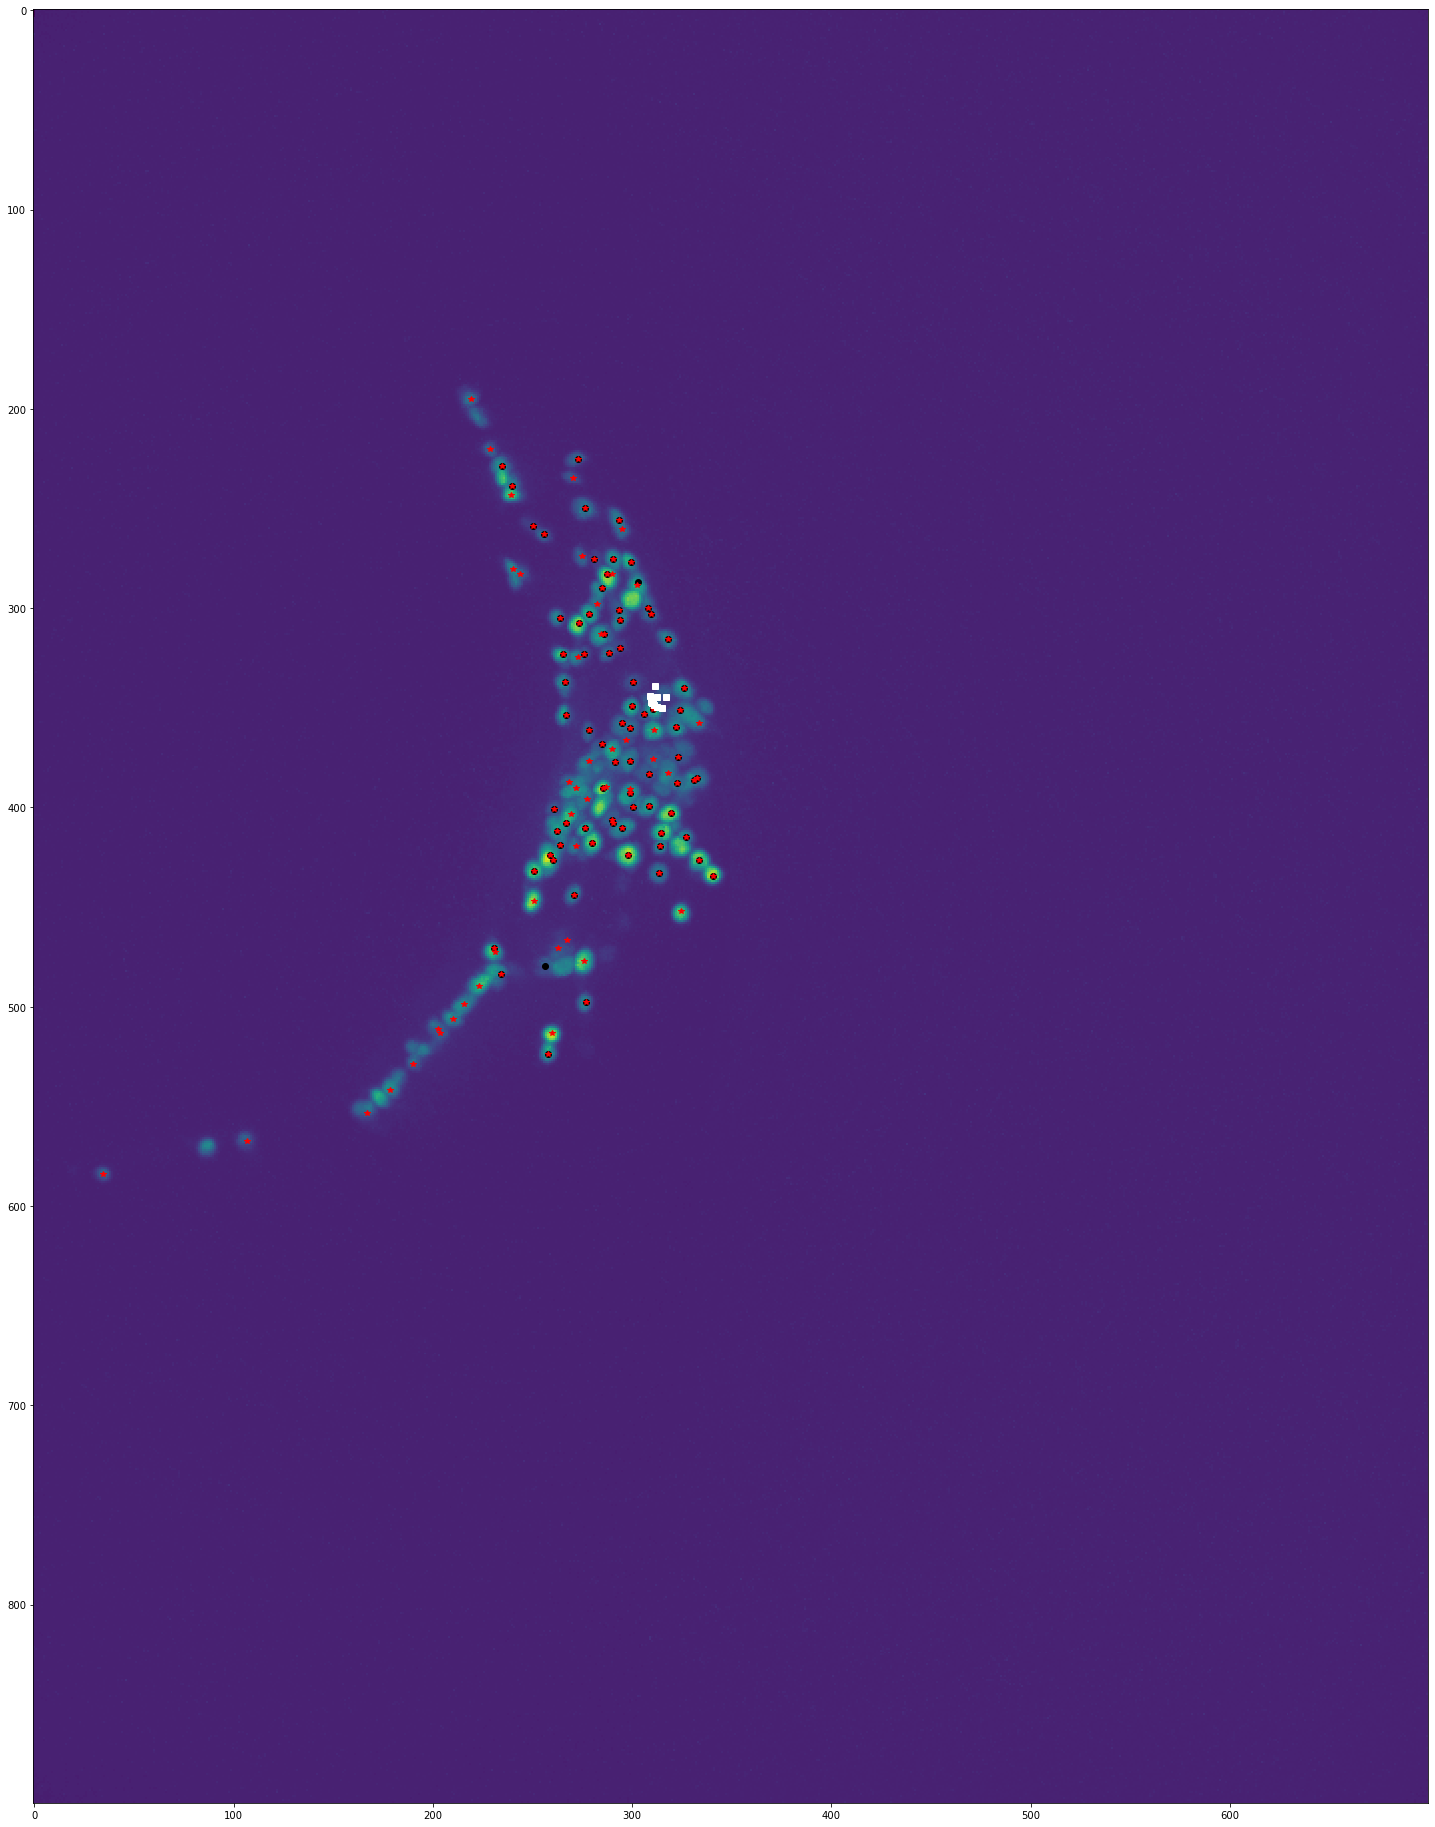

In [223]:
plt.figure(figsize=(25,45))

t = 0
all_names = list(df_tracks.columns.levels[0])

def get_pose(df, t, coords=['z', 'x', 'y']):
    out = []
    for c in coords:
        out.append([df[name][c].iloc[t] for name in all_names])
    return out

out = get_pose(df_raw, t)
z1, x1, y1 = out

out = get_pose(df_initial, t)
z2, x2, y2 = out

plt.imshow(np.max(project_data.red_data[t,...], axis=0).T)

plt.plot(x1, y1, 'ko')
plt.plot(x2, y2, 'r*');

# Indices of imputed neuron1
i = 9
i1, i2 = [i*3-2, i*3-1]
for d in all_dat:
    plt.plot(d[0, i1], d[0, i2], 'sw')

# Recalculate a well tracked neuron

In [257]:
df_with_likelihood = df_raw.copy()

likelihood_thresh = 0.3
df_filter = filter_dataframe_using_likelihood(df_with_likelihood, likelihood_thresh)
df_only_locations, old2new_names = df_of_only_locations(df_filter)

  0%|          | 0/120 [00:00<?, ?it/s]

In [343]:
df_sklearn, imputer, scaler = scale_impute_descale(df_only_locations, 5, random_state=None, max_iter=20, imputer_kwargs={'sample_posterior': False})

[IterativeImputer] Completing matrix with shape (1500, 360)
[IterativeImputer] Change: 148.6008150791219, scaled tolerance: 0.021305284816973722 
[IterativeImputer] Change: 240.84482582322119, scaled tolerance: 0.021305284816973722 
[IterativeImputer] Change: 252.6236387947175, scaled tolerance: 0.021305284816973722 
[IterativeImputer] Change: 229.94979092004405, scaled tolerance: 0.021305284816973722 
[IterativeImputer] Change: 216.69309452641056, scaled tolerance: 0.021305284816973722 
[IterativeImputer] Change: 223.9676803064697, scaled tolerance: 0.021305284816973722 
[IterativeImputer] Change: 223.8066288716532, scaled tolerance: 0.021305284816973722 
[IterativeImputer] Change: 201.8948543502396, scaled tolerance: 0.021305284816973722 
[IterativeImputer] Change: 200.55291350317583, scaled tolerance: 0.021305284816973722 
[IterativeImputer] Change: 205.44832326057792, scaled tolerance: 0.021305284816973722 
[IterativeImputer] Change: 238.91349703974078, scaled tolerance: 0.02130528

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [344]:
name = 'neuron_001'

In [345]:
# Now apply the imputer to a dataframe with that neuron set to nan

df_with_gap = df_raw.copy()
# df_with_gap[name] = np.nan
df_with_gap[name].iloc[:-300] = np.nan

print(df_raw[name].head())
print(df_with_gap[name].head())

df_gap_only_locations, old2new_names = df_of_only_locations(df_with_gap)

           z           x           y  likelihood
0  10.443094  276.636464  497.683978    0.671144
1  10.444206  290.109442  483.150215    0.899519
2   9.079404  283.942928  480.393300    0.682838
3   9.909292  268.496681  472.934735    0.689108
4  11.068036  247.073171  486.473684    0.745689
    z   x   y  likelihood
0 NaN NaN NaN         NaN
1 NaN NaN NaN         NaN
2 NaN NaN NaN         NaN
3 NaN NaN NaN         NaN
4 NaN NaN NaN         NaN


/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [346]:
dat = df_gap_only_locations.to_numpy()
dat_normalized = scaler.fit_transform(dat)
dat_sklearn2 = imputer.transform(dat_normalized)
dat_sklearn2 = scaler.inverse_transform(dat_sklearn2)

df_sklearn2 = pd.DataFrame(dat_sklearn2, columns=df_gap_only_locations.columns)

[IterativeImputer] Completing matrix with shape (1500, 360)


In [347]:
df_imputed2 = update_dataframe_using_flat_names(df_raw, df_sklearn2, old2new_names)

In [348]:
df_imputed2[name].head()

,z,x,y,likelihood
0,8.997859,263.749014,502.144245,0.671144
1,9.229012,265.317676,498.297498,0.899519
2,9.064011,252.073733,501.407905,0.682838
3,8.806232,243.175410,498.155915,0.689108
4,8.912587,226.489464,510.650196,0.745689


In [349]:
df_raw[name].head()

,z,x,y,likelihood
0,10.443094,276.636464,497.683978,0.671144
1,10.444206,290.109442,483.150215,0.899519
2,9.079404,283.942928,480.393300,0.682838
3,9.909292,268.496681,472.934735,0.689108
4,11.068036,247.073171,486.473684,0.745689


In [350]:
df_raw[name].count()

z             1499
x             1499
y             1499
likelihood    1491
dtype: int64

In [353]:
# Are the estimator features stable?
# [print(i) for i in imputer.imputation_sequence_ if i.feat_idx==91]

# Recalculate a well tracked neuron, with a different regressor

In [257]:
df_with_likelihood = df_raw.copy()

likelihood_thresh = 0.3
df_filter = filter_dataframe_using_likelihood(df_with_likelihood, likelihood_thresh)
df_only_locations, old2new_names = df_of_only_locations(df_filter)

  0%|          | 0/120 [00:00<?, ?it/s]

In [470]:
from DLC_for_WBFM.utils.postprocessing.utils_imputation import takens_embedding
dat_takens = np.squeeze(takens_embedding(df_only_locations, dimension=2, delay=1, append_dim=2))

In [471]:
dat_takens.shape

(1499, 720)

In [472]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
# estimator = PLSRegression(n_components=4, scale=False)
# pcr = make_pipeline(PCA(n_components=6, whiten=True), LinearRegression())
# pcr = make_pipeline(PLSRegression(n_components=4, scale=True))


In [473]:
# estimator = pcr
estimator = BayesianRidge()
imputer = IterativeImputer(estimator=estimator,
                           random_state=None,
                           missing_values=np.nan,
                           verbose=1,
                           n_nearest_features=20,
                           max_iter=20)
dat_sklearn = imputer.fit_transform(dat_takens)
df_sklearn = pd.DataFrame(data=dat_sklearn, columns=df_no_all_nan.columns)

[IterativeImputer] Completing matrix with shape (1499, 720)
[IterativeImputer] Change: 18372.317342679213, scaled tolerance: 1.1977180443171132 
[IterativeImputer] Change: 20683.507205993563, scaled tolerance: 1.1977180443171132 
[IterativeImputer] Change: 20578.967986249136, scaled tolerance: 1.1977180443171132 
[IterativeImputer] Change: 21171.929354248663, scaled tolerance: 1.1977180443171132 
[IterativeImputer] Change: 20585.77269067619, scaled tolerance: 1.1977180443171132 
[IterativeImputer] Change: 18572.866506096136, scaled tolerance: 1.1977180443171132 
[IterativeImputer] Change: 18116.878009343218, scaled tolerance: 1.1977180443171132 
[IterativeImputer] Change: 20229.348700988467, scaled tolerance: 1.1977180443171132 


KeyboardInterrupt: 

In [ ]:
name = 'neuron_030'

In [ ]:
# Now apply the imputer to a dataframe with that neuron set to nan

df_with_gap = df_raw.copy()
# df_with_gap[name] = np.nan
df_with_gap[name].iloc[:-300] = np.nan

# print(df_raw[name].head())
# print(df_with_gap[name].head())

df_gap_only_locations, old2new_names = df_of_only_locations(df_with_gap)

In [430]:
to_scale = True
dat = df_gap_only_locations.to_numpy()
if to_scale:
    dat_normalized = scaler.fit_transform(dat)
    dat_sklearn2 = imputer.transform(dat_normalized)
    dat_sklearn2 = scaler.inverse_transform(dat_sklearn2)
else:
    dat_sklearn2 = imputer.transform(dat)

df_sklearn2 = pd.DataFrame(dat_sklearn2, columns=df_gap_only_locations.columns)

[IterativeImputer] Completing matrix with shape (1500, 360)


In [431]:
df_imputed2 = update_dataframe_using_flat_names(df_raw, df_sklearn2, old2new_names)

In [432]:
df_imputed2[name].head()

,z,x,y,likelihood
0,4.323010,304.800792,410.924350,0.721008
1,4.513303,284.538867,387.004254,0.709858
2,4.515471,282.356623,388.297177,0.840683
3,4.686869,267.341006,379.254612,0.794537
4,4.696631,270.559727,397.368151,0.785145


In [429]:
df_raw[name].head()

,z,x,y,likelihood
0,5.440061,314.676783,412.823976,0.721008
1,4.246136,291.989298,391.803805,0.709858
2,5.381924,282.161322,390.695821,0.840683
3,4.643210,266.586420,381.012346,0.794537
4,4.191375,263.119946,396.820755,0.785145
